


<p>
<img src="./pics/header.svg" style="float: center"/>
</p>

***

# D1 - System Equivalent Model Mixing

> Miha Kodrič $\,\,$ *miha.kodric@fs.uni-lj.si*

***

> ### <i class="fa fa-graduation-cap" aria-hidden="true"></i> Lesson highlights  
> - #### introduction to expansion processes
> - #### physical interpretation of SEMM method
> - #### performing SEMM inside ``pyFBS`` package
> - #### applications of SEMM

***

# System Equivalent Model Mixing
Klaassen, S. W., van der Seijs, M. V., & de Klerk, D. (2018). System equivalent model mixing. Mechanical Systems and Signal Processing, 105, 90-112. <a href="https://www.sciencedirect.com/science/article/pii/S0888327017306301">https://www.sciencedirect.com/science/article/pii/S0888327017306301</a>

System Equivalent Model Mixing (SEMM) was introduced by Klaassen et al. The method forms a hybrid structural dynamic model by mixing the numerical and experimental FRFs. The procedure applies a substructuring approach to expand the model dynamics contained in an overlay model $Y_{\text{ov}}$ onto the DoF space of a parent model $Y_{\text{par}}$. The method is based on the parent model, which provides the extensive DoF set.  The dynamic properties are introduced by the overlay model, which is generally obtained by experiment. To form the final hybrid model the dynamic properties of the parent model are eliminated with the removed model.
<p>
<img src="./pics/idea_of_SEMM.svg?1" width=800/>
</p>

SEMM is based on the coupling on all shared DoF of two equivalent component models: a parent model $Y_{\text{par}}$ and an overlay model $Y_{\text{ov}}$

The DoF set of the parent model is contained in the internal (i) and boundary (b) DoFs. The boundary DoFs must overlap with the overlay model so that the dynamic coupling can be performed, while the internal DoFs of the parent model can be unique to its own. The equivalent models, appearing in the SEMM method, are arranged by separating the internal and boundary DoFs in the admittance matrices:
	\begin{equation}\label{parent_overlay}
		\mathbf{Y}^{\text{par}}\triangleq
		\begin{bmatrix}
			\mathbf{Y}_{\text{ii}}&\mathbf{Y}_{\text{ib}}\\
			\mathbf{Y}_{\text{bi}}&\mathbf{Y}_{\text{bb}}
		\end{bmatrix}^{\text{par}},\quad
		\mathbf{Y}^{\text{ov}}\triangleq
		\begin{bmatrix}
			\mathbf{Y}_{\text{bb}}
		\end{bmatrix}^{\text{ov}},\quad
		\mathbf{Y}^{\text{rem}}\triangleq
		\begin{bmatrix}
			\mathbf{Y}_{\text{bb}}
		\end{bmatrix}^{\text{par}}.
	\end{equation}
<p>
<img src="./pics/num_to_par.png?1" width=1000/>
</p>


The LM FBS methodology is used to form a hybrid model in the SEMM method. First, the original parent model dynamic is removed with the dynamic decoupling between the parent and removed model. Next, the dynamic coupling between the parent and the overlay model, to force the overlay dynamics in the parent model, is performed, which produces a hybrid model. The hybrid model combines all three models in the admittance form. The basic equation of motion for the SEMM method can be formulated as:
	\begin{equation}\label{izhodisca_enacba_SEMM}
		\begin{bmatrix}
			\boldsymbol{u}^{\text{par}}\\
			\boldsymbol{u}^{\text{rem}}\\
			\boldsymbol{u}^{\text{ov}}
		\end{bmatrix}
		=
		\begin{bmatrix}
			\mathbf{Y}^{\text{par}}& & \\
			&-\mathbf{Y}^{\text{rem}}& \\
			& &\mathbf{Y}^{\text{ov}}
		\end{bmatrix}
		\begin{bmatrix}
			\boldsymbol{f}^{\text{par}}\\
			\boldsymbol{0}\\
			\boldsymbol{0}
		\end{bmatrix}
		-
		\begin{bmatrix}
			\boldsymbol{g}^{\text{par}}\\
			\boldsymbol{g}^{\text{rem}}\\
			\boldsymbol{g}^{\text{ov}}
		\end{bmatrix}.
	\end{equation}    
<p>
<img src="./pics/Y_matrix.svg?1" width=300/>
</p>

Following the LM FBS methodology, the vector of DoFs is $\boldsymbol{u}$ and represents the responses to the external force vector $\boldsymbol{f}$ acting only on the parent model and $\boldsymbol{g}$ is the vector of the interface forces between the equivalent models. The compatibility and equilibrium conditions between the equivalent models are defined using the following equations:
	\begin{eqnarray}
		\label{rav_kom_pogoji1}
		\mathbf{B}\boldsymbol{u}=0,
		\\
		\label{rav_kom_pogoji2}
		\boldsymbol{g}=-\mathbf{B}^{\text{T}}\,\boldsymbol{\lambda},
	\end{eqnarray}
	where the signed Boolean matrix is defined as:
	\begin{equation}\label{matrika_B}
		\mathbf{B}=
		\begin{bmatrix}
			\mathbf{B}^{\text{par}}&\mathbf{B}^{\text{rem}}&\mathbf{B}^{\text{ov}}
		\end{bmatrix}
		=
		\left[
		\begin{array}{rr|r|r}
			0 & -\mathbf{I} & \mathbf{I} & 0\\
			0 & 0 & -\mathbf{I} & \mathbf{I}	
		\end{array}
		\right].
	\end{equation}
<p>
<img src="./pics/B_matrix.svg?2" width=600/>
</p>

Considering the compatibility and the equilibrium conditions in the basic equation of motion, together with the  Lagrange multiplier's elimination, results in a single-line form of the SEMM method:
	\begin{equation}
		\overline{\mathbf{Y}}
		=
		\mathbf{Y}
		-
		\mathbf{Y}\,\mathbf{B}^{\text{T}}\,
		\left(\mathbf{B}\, \mathbf{Y}\,\mathbf{B}^{\text{T}}\right)^{-1} \,
		\mathbf{B}\, \mathbf{Y},
		\text{ where: }
		\mathbf{Y}
		\triangleq
		\begin{bmatrix}
			\mathbf{Y}^{\text{par}}& & \\
			&-\mathbf{Y}^{\text{rem}}& \\
			& &\mathbf{Y}^{\text{ov}}
		\end{bmatrix}.
	\end{equation}
To retain the primary DoFs, the primary formulation must be reformulated using the localization matrix, which results in a single-line form of the basic SEMM method:
	\begin{equation}\label{SEMM_enovrsticno}
		\mathbf{Y}^{\text{SEMM}}=
		\begin{bmatrix}
			\mathbf{Y}
		\end{bmatrix}^{\text{par}}
		-
		\begin{bmatrix}
			\mathbf{Y}_{\text{ib}}\\
			\mathbf{Y}_{\text{bb}}
		\end{bmatrix}^{\text{par}}
		%\,
		\left( \mathbf{Y}^{\text{rem}}\right) ^{-1}
		%\,
		\left( \mathbf{Y}^{\text{rem}}-\mathbf{Y}^{\text{ov}}\right)
		%\,
		\left( \mathbf{Y}^{\text{rem}}\right)^{-1}
		%\,
		\begin{bmatrix}
			\mathbf{Y}_{\text{bi}}&\mathbf{Y}_{\text{bb}}
		\end{bmatrix}^{\text{par}}.
	\end{equation}

<div class="alert alert-block alert-info">
    <i class="fa fa-info-circle" aria-hidden="true"></i>
    This single-line form of the SEMM method is most suitable for coding since there is no need to construct a Boolean matrix - <b>B</b>. It is only necessary to reformulate input matrices by separating internal and boundary DoFs.
</div>

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import pyvista as pv
import matplotlib.pyplot as plt

import pyFBS

In [2]:
pyFBS.download_lab_testbench()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 6451.53it/s]

# 1. Physical interpretation of SEMM
To understand the basic background of the SEMM is very convenient to analyse a numerical N-DoF system, where the correct results are known. For this case, let us assume, that the analysed system is a simple 4-DoFs system.
<p>
<img src="./pics/basic_4_DoF_example.svg?1" width=800/>
</p>


### 1.1.1. Preparing system matrices
For the purpose of explanation of SEMM method, FRFs of parent and experimental model will be generated numerically. Numerical models are usually modelled using the finite element method, providing mass and stiffness matrices. In this 4-DoF case, it is easy to manually derive the mass and stiffness matrices. For the experimental model, we will use the same technique, except that mass and stiffness will be slightly shifted, to simulate the difference between the virtual and real models.

In [3]:
m1, m2, m3, m4 = 1., 1., 1., 1.
k1, k2, k3, k4 = 100., 100., 100., 100.

m5, m6, m7, m8 = 1., 1.1, 1., 1.1
k5, k6, k7, k8 = 110., 102., 100., 90.

M_par = np.array([
    [m1,  0,  0,  0],
    [ 0, m2,  0,  0],
    [ 0,  0, m3,  0],
    [ 0,  0,  0, m4]])

K_par = np.array([
    [k1+k2, -k2, 0, 0],
    [-k2, k2+k3, -k3, 0],
    [0, -k3, k3+k4, -k4],
    [0, 0, -k4, k4]])

M_ov = np.array([
    [m5, 0, 0, 0],
    [0, m6, 0, 0],
    [0, 0, m7, 0],
    [0, 0, 0, m8]])

K_ov = np.array([
    [k5+k6, -k6, 0, 0],
    [-k6, k6+k7, -k7, 0],
    [0, -k7, k7+k8, -k8],
    [0, 0, -k8, k8]])

Based on mass and stiffness matrices are defined FRF matrices for both models.

In [4]:
MK_par = pyFBS.MK_model(
    manual_mass_matrix=M_par,
    manual_stifenss_matrix=K_par)
MK_par.FRF_synth_full(f_start=0, f_end=5,f_resolution=0.01)

MK_ov = pyFBS.MK_model(
    manual_mass_matrix=M_ov,
    manual_stifenss_matrix=K_ov)
MK_ov.FRF_synth_full(f_start=0, f_end=5,f_resolution=0.01)

C:\Users\kodric\Anaconda3\lib\site-packages\scipy\sparse\linalg\eigen\arpack\arpack.py:1593: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "


The parent model is presented by a complete numerical model, while the overly model is usually obtained experimentally, therefore are known only responses at the last two DoFs (``Y_ov``). To clearly understand the physical interpretation of a SEMM, we also generate a full FRF matrix (``Y_ov_full``), which is not known in a real case. 


Although that ``Y_ov`` is defined only at boundary DoFs, their FRF contains dynamic properties that are a consequence of all DoFs of the experimental model. But still, the relations boundary-internal and internal-internal are not known.

<p>
<img src="./pics/schematic_representation_of_SEMM_matrix.svg?2" width=800/>
</p>


In [5]:
freq = MK_par.freq # frequency points of FRFs must be the same for both, numerical and experimental model

Y_par = MK_par.FRF # DoFs structure of expanded model

Y_ov_full = MK_ov.FRF # in reality, we actually don't know the full model, this is the model that we are looking for.

boundary_DoFs = np.array([2, 3]) # here are defined indexes for calling boundary elements from the full FRF matrix
Y_ov = Y_ov_full[:, boundary_DoFs[:, np.newaxis], boundary_DoFs] 

Y_rem = -Y_par[:, boundary_DoFs[:, np.newaxis], boundary_DoFs]

In [6]:
Y = np.zeros((freq.shape[0], 8, 8))
Y[:, :4, :4] = Y_par
Y[:, 4:6, 4:6] = Y_rem
Y[:, 6:, 6:] = Y_ov

Now it is necessary to define the matrix $\boldsymbol{B}$, in which we prescribe the connections between DoFs. It is necessary to connect the boundary (b) between the parent and removed model and between the removed and overlay model.

The following conditions must be fulfilled:

$u_{3}^{\text{par}} = u_{3}^{\text{rem}}$

$u_{4}^{\text{par}} = u_{4}^{\text{rem}}$

$u_{3}^{\text{rem}} = u_{7}^{\text{ov}}$

$u_{4}^{\text{rem}} = u_{8}^{\text{ov}}$
<p>
<img src="./pics/schematic_representation_of_B_matrix_basic.svg?2" width=600/>
</p>

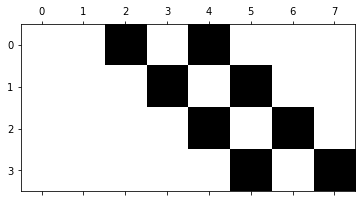

In [7]:
B = np.zeros((4, 8)) # (boundary DoFs * 2, parent + removed + oberlay model DoFs)
B[0, [2, 4]] = [1, -1]
B[1, [3, 5]] = [1, -1]
B[2, [4, 6]] = [1, -1]
B[3, [5, 7]] = [1, -1]

plt.spy(B)

Now everything is ready to simply use the basic equation of LM FBS coupling and thus get the response of the hybrid system.

In [8]:
Y_int = B@Y@B.T
Y_SEMM = Y - Y@B.T@np.linalg.inv(Y_int)@B@Y

Transformation of the coupled matrix $\mathbf{Y}_{\text{dual}}$ from dual to primal domain is achieved by localization matrix $\mathbf{L}$:
$$ 
\mathbf{Y}_{\text{primal}} = \mathbf{L}^{+} \, \mathbf{Y}_{\text{dual}} \, \left(\mathbf{L}^{+}\right)^{\text{T}}
$$
Matrix $\mathbf{L}$ takes into account that connected DoFs has the same response. This has the same effect as manual selection of the unique rows and columns from the dual FRF matrix $\mathbf{Y}_{\text{dual}}$.

Following conditions are fulfield:

$u_{3}^{\text{par}} = u_{3}^{\text{rem}} = u_{7}^{\text{ov}}$

$u_{4^{\text{par}}} = u_{4}^{\text{rem}} = u_{7}^{\text{ov}}$,

using equation:

$$ u = \boldsymbol{L} q = 
\begin{bmatrix}
u_{1}^{\text{par}}\\
u_{2}^{\text{par}}\\
u_{3}^{\text{par}}\\
u_{4}^{\text{par}}\\
u_{3}^{\text{rem}}\\
u_{4}^{\text{rem}}\\
u_{7}^{\text{ov}}\\
u_{8}^{\text{ov}}\\
\end{bmatrix}
=
\begin{bmatrix}
1&0&0&0\\
0&1&0&0\\
0&0&1&0\\
0&0&0&1\\
0&0&1&0\\
0&0&0&1\\
0&0&1&0\\
0&0&0&1\\
\end{bmatrix}
\begin{bmatrix}
u_{1}\\
u_{2}\\
u_{3}\\
u_{4}
\end{bmatrix}
$$
Vector $\boldsymbol{u}$ standas for all DoFs and $\boldsymbol{q}$ for unique DoFs.

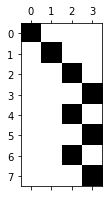

In [9]:
L = np.zeros((8, 4))
L[:4] = np.eye(4)
L[4:6, -2:] = np.eye(2)
L[6:, -2:] = np.eye(2)

plt.figure(figsize= (3, 3)) # visual representation of matrix L
plt.spy(L);

In [10]:
Y_SEMM_primal = np.linalg.pinv(L)@Y_SEMM@np.linalg.pinv(L).T

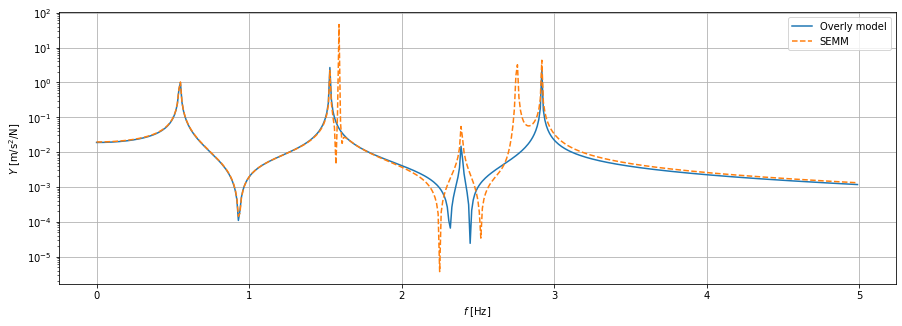

In [11]:
plt.figure(figsize = (15, 5))
p1 = 1
p2 = 1
# plt.semilogy(freq, np.abs(Y_par[:, p1, p2]), label = "Parent model")
plt.semilogy(freq, np.abs(Y_ov_full[:, p1, p2]), label = "Overly model")
plt.semilogy(freq, np.abs(Y_SEMM_primal[:, p1, p2]), "--", label = "SEMM")
plt.legend()
plt.xlabel("$f$ [Hz]")
plt.ylabel("$Y$ [m/s$^2$/N]")
plt.grid();

## Why do have FRFs provided with SEMM spurious peaks?
To fully understand the operation of the SEMM method, it is necessary to look at the physical model of the system that was actually formed by the process of coupling and uncoupling within the SEMM method.
<p>
<img src="./pics/formation_of_hybrid_model_basic_semm.png?1" width=1000/>
</p>

Let's derive a mass and stiffness matrix and generate FRFs and compare the response of this system with the response obtained by using the SEMM method.

In [12]:
M_hybrid = np.array([
#    u1  u2           u3           u4  u5  u6  u1rem  u2rem
    [m1,  0,           0,           0,  0,  0,     0,     0], # u1
    [ 0, m2,           0,           0,  0,  0,     0,     0], # u2
    [ 0,  0, m3+m7+(-m3),           0,  0,  0,     0,     0], # u3
    [ 0,  0,           0, m4+m8+(-m4),  0,  0,     0,     0], # u4
    [ 0,  0,           0,           0, m5,  0,     0,     0], # u5
    [ 0,  0,           0,           0,  0, m6,     0,     0], # u6
    [ 0,  0,           0,           0,  0,  0, (-m1),     0], # u1rem
    [ 0,  0,           0,           0,  0,  0,     0, (-m2)]])# u2rem

K_hybrid = np.array([
#       u1     u2                       u3            u4     u5     u6         u1rem        u2rem
    [k1+k2,   -k2,                       0,            0,     0,     0,            0,           0], # u1
    [  -k2, k2+k3,                     -k3,            0,     0,     0,            0,           0], # u2
    [    0,   -k3, k3+k4+k7+k8+(-k3)+(-k4), -k4-k8-(-k4),     0,   -k7,            0,      -(-k3)], # u3
    [    0,     0,            -k4-k8-(-k4),  k4+k8+(-k4),     0,     0,            0,           0], # u4
    [    0,     0,                       0,            0, k5+k6,   -k6,            0,           0], # u5
    [    0,     0,                     -k7,            0,   -k6, k6+k7,            0,           0], # u6
    [    0,     0,                       0,            0,     0,     0,  (-k1)+(-k2),      -(-k2)], # u1rem
    [    0,     0,                  -(-k3),            0,     0,     0,       -(-k2), (-k2)+(-k3)]])# u2rem



MK_hybrid = pyFBS.MK_model(
    manual_mass_matrix=M_hybrid,
    manual_stifenss_matrix=K_hybrid)

MK_hybrid.FRF_synth_full(f_start=0, f_end=5,f_resolution=0.01)

C:\Users\kodric\Anaconda3\lib\site-packages\scipy\sparse\linalg\eigen\arpack\arpack.py:1593: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "


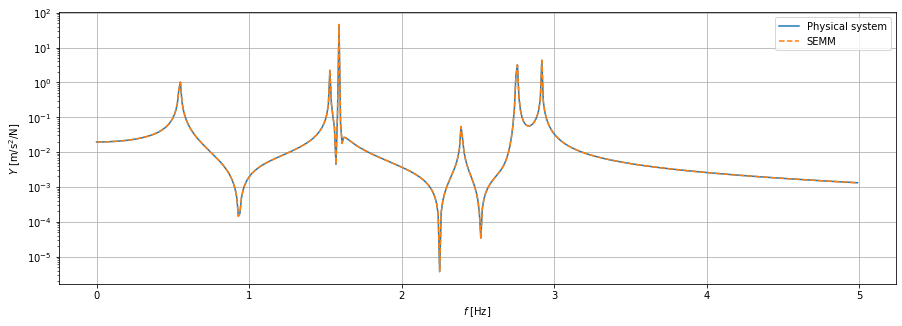

In [13]:
plt.figure(figsize = (15, 5))

plt.semilogy(freq, np.abs(MK_hybrid.FRF[:, 1, 1]), "-", label = "Physical system")
plt.semilogy(freq, np.abs(Y_SEMM_primal[:, 1, 1]), "--", label = "SEMM")
plt.legend()
plt.xlabel("$f$ [Hz]")
plt.ylabel("$Y$ [m/s$^2$/N]")
plt.grid();

<div class="alert alert-block alert-info">
    <i class="far fa-keyboard" aria-hidden="true"></i>
    <b>Observation:</b> 
    It turns out that the system obtained by the SEMM method has the same response as the physical model in the first four DoFs (parent model) in cofiguration when the overlay and removed model are connected to it. This is also a source for spurious peaks in FRFs as such a system actually has 8 DoFs and therefore also 8 natural frequencies that occur in FRFs. We can not see all 8 natural frequencies in FRFs because some are duplicated, but we can identify them from the physical model.
</div>

In [14]:
MK_hybrid.eig_freq/(2*np.pi)

array([0.54719953, 1.53207429, 1.59154943, 1.59154943, 2.39415407,
       2.75664447, 2.75664448, 2.9203028 ])

## Extension of SEMM method - extended interface
Klassen has proven that using knowledge from decoupling is beneficial to perform decoupling on the extended interface. In the case of SEMM, this is achieved by coupling parent and removed the model at all DoFs and not just at the boundary as was done in the basic formulation. This method is impossible to interpret in the physical domain since the whole parent model is removed. In the frequency domain, it is possible, since we are dealing with FRFs, and not directly with masses and springs. 

This formulation removes spurious peaks in the frequency domain with an extension of the removed interface. The ability to remove spurious peaks, which are a consequence of the conflicting dynamics between the overlay ($  \mathbf{Y}^{\text{ov}} $) and the removed numerical ($  \mathbf{Y}^{\text{par}}) $, is essential to improve the method's applicability. If the removed interface is extended to all the internal DoFs, then the removed model has the following form:
	\begin{equation}\label{key}
		\mathbf{Y}^{\text{rem}}=
		\begin{bmatrix}
			\mathbf{Y}_{\text{ii}}&\mathbf{Y}_{\text{ib}}\\
			\mathbf{Y}_{\text{bi}}&\mathbf{Y}_{\text{bb}}
		\end{bmatrix}^{\text{par}}.
	\end{equation}
    
The coupling equation has still the same form as was at basic SEMM, except that the removed model is extended to all DoFs of the numerical model.

\begin{equation}
		\overline{\mathbf{Y}}
		=
		\mathbf{Y}
		-
		\mathbf{Y}\,\mathbf{B}^{\text{T}}\,
		\left(\mathbf{B}\, \mathbf{Y}\,\mathbf{B}^{\text{T}}\right)^{-1} \,
		\mathbf{B}\, \mathbf{Y},
		\text{ where: }
		\mathbf{Y}
		\triangleq
		\begin{bmatrix}
			\mathbf{Y}^{\text{par}}& & \\
			&-\mathbf{Y}^{\text{rem}}& \\
			& &\mathbf{Y}^{\text{ov}}
		\end{bmatrix}.
	\end{equation}


The final version of the fully extend SEMM method can also be written in a single-line notation where relations defined in matrix $\boldsymbol{B}$ are directly applied:
	\begin{equation}\label{SEMM_enovrsticno-FullyExtended}
		\mathbf{Y}^{\text{SEMM}}=
		\mathbf{Y}^{\text{par}}
		-
		\mathbf{Y}^{\text{par}}
		%\,
		\left( \begin{bmatrix} \mathbf{Y}_{\text{bi}}&\mathbf{Y}_{\text{bb}}\end{bmatrix}^{\text{rem}}\right ) ^{+}
		%\,
		\left( \mathbf{Y}^{\text{rem}}_{\text{bb}}-\mathbf{Y}^{\text{ov}}\right)
		%\,
		\left( \begin{bmatrix} \mathbf{Y}_{\text{ib}}\\ \mathbf{Y}_{\text{bb}}\end{bmatrix}^{\text{rem}}\right ) ^{+}
		%\,
		\mathbf{Y}^{\text{par}}.
	\end{equation}

<p>
<img src="./pics/schematic_representation_of_Y_and_B_matrix_fully_extend.svg?1" width=1000/>
</p>


In [15]:
Y_rem_fe = -np.copy(Y_par) # use np.copy - better safe than sorry

In [16]:
Y_fe = np.zeros((Y_par.shape[0], 10, 10))
Y_fe[:, :4, :4] = Y_par
Y_fe[:, 4:8, 4:8] = Y_rem_fe
Y_fe[:, 8:, 8:] = Y_ov

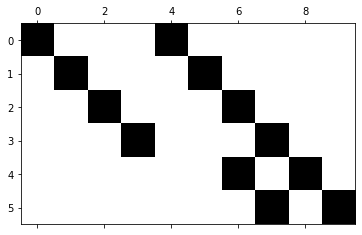

In [17]:
B_fe = np.zeros((6, 10))  # (DoFs of parent + b. DoFs of overly model, parent + removed + oberlay model DoFs)
B_fe[0, [0, 4]] = [1, -1]
B_fe[1, [1, 5]] = [1, -1]
B_fe[2, [2, 6]] = [1, -1]
B_fe[3, [3, 7]] = [1, -1]
B_fe[4, [6, 8]] = [1, -1]
B_fe[5, [7, 9]] = [1, -1]
plt.spy(B_fe)

<div class="alert alert-block alert-warning">
    <i class="fa fa-exclamation-triangle" aria-hidden="true"></i>
    <b>Warning!</b> 
    In the case of a fully-extended formulation of the SEMM method, special attention must be paid to the analysis of the interface matrix that is inverted during couling. It turns out that this matrix is always singular (its determinant is 0), so its inverse does not exist. The problem is solved by using a pseudoinverse instead of an inverse in the classical equation for coupling according to the LM FBS method, which enables the inversion of the matrix and hence the calculation of the response of the hybrid model.
</div>

In [18]:
Y_int_fe = B_fe@Y_fe@B_fe.T

In [19]:
# if determinant of matrix is 0, this indicates singular matrix and its inverse does not exist.
(np.linalg.det(Y_int_fe) == 0).all()

True

In [20]:
# Let's use pinv instead of inv
Y_SEMM_fe = Y_fe - Y_fe@B_fe.T@np.linalg.pinv(Y_int_fe)@B_fe@Y_fe

<div class="alert alert-block alert-warning">
    <i class="fa fa-exclamation-triangle" aria-hidden="true"></i>
    <b>Warning!</b> 
    Due to the use of pseudoinverse, the connections between equivalent models are no longer perfect, so in the hybrid model, duplicate degrees of freedom do not have the same response. It turns out that the only real response that reflects the experimental model most accurately is the response at the DoFs of the parent model.
</div>

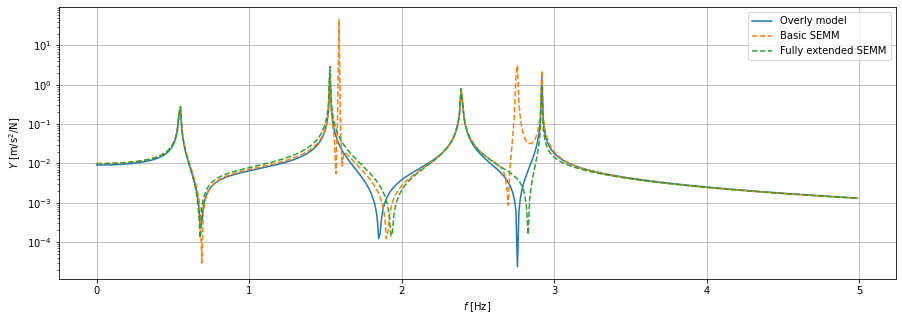

In [21]:
plt.figure(figsize = (15, 5))
p1 = 0
p2 = 0
# plt.semilogy(freq, np.abs(MK_par.FRF[:, p1, p2]), label = "Parent model")
plt.semilogy(freq, np.abs(MK_ov.FRF[:, p1, p2]), label = "Overly model")
plt.semilogy(freq, np.abs(Y_SEMM_primal[:, p1, p2]), "--", label = "Basic SEMM")
plt.semilogy(freq, np.abs(Y_SEMM_fe[:, p1, p2]), "--", label = "Fully extended SEMM")
plt.xlabel("$f$ [Hz]")
plt.ylabel("$Y$ [m/s$^2$/N]")
plt.legend()
plt.grid();

<div class="alert alert-block alert-success">
    <i class="fa fa-thumbs-up" aria-hidden="true"></i>
The effect of the extended interface is perfectly visible here, as the spurious peaks were successfully removed, and the response of the hybrid model came even closer to the experimental model.
This fully extended formulation of the SEMM method is the most commonly used in practice, as it usually gives much better results than the basic formulation.
</div>

### How to do the same using ``pyFBS`` function ``SEMM``
Inside ``pyFBS`` is implemented oneline formulations of SEMM method. This means, that the connection between boundary DoFs are not achieved by building the Bollenan matrix $\mathbf{B}$, but by reformulation of input matrices. 

The connections between the DoFs od paren and overlay models are made on the basis of contiguous locations, so in the SEMM function it is necessary to define, in addition to the FRF matrix, also the locations of the DoFs represented in this FRF matrix. ``pyFBS`` will then automatically find matching locations and directions and treat these DoFs as boundary DoFs.

In [22]:
x = np.arange(4)
y = np.zeros(4)
z = np.zeros(4)
points = np.array([x, y, z]).T

In [23]:
# Parent model
df_response_parent = pd.DataFrame({
    "Position_1": points[:, 0],
    "Position_2": points[:, 1],
    "Position_3": points[:, 2],
    "Direction_1": np.ones(len(points)),
    "Direction_2": np.zeros(len(points)),
    "Direction_3": np.zeros(len(points)),
})
df_impact_parent = pd.DataFrame({
    "Position_1": points[:, 0],
    "Position_2": points[:, 1],
    "Position_3": points[:, 2],
    "Direction_1": np.ones(len(points)),
    "Direction_2": np.zeros(len(points)),
    "Direction_3": np.zeros(len(points)),
})

# Overlay model
df_response_overlay = pd.DataFrame({
    "Position_1": points[2:, 0],
    "Position_2": points[2:, 1],
    "Position_3": points[2:, 2],
    "Direction_1": np.ones(2),
    "Direction_2": np.zeros(2),
    "Direction_3": np.zeros(2),
})
df_impact_overlay = pd.DataFrame({
    "Position_1": points[2:, 0],
    "Position_2": points[2:, 1],
    "Position_3": points[2:, 2],
    "Direction_1": np.ones(2),
    "Direction_2": np.zeros(2),
    "Direction_3": np.zeros(2),
})

In [24]:
Y_SEMM_pyFBS_basic = pyFBS.SEMM(Y_par, Y_ov,
                               df_chn_num = df_response_parent,
                               df_imp_num = df_impact_parent,
                               df_chn_exp = df_response_overlay,
                               df_imp_exp = df_impact_overlay,
                               SEMM_type='basic')

In [25]:
Y_SEMM_pyFBS_fully_extended = pyFBS.SEMM(Y_par, Y_ov,
                       df_chn_num = df_response_parent,
                       df_imp_num = df_impact_parent,
                       df_chn_exp = df_response_overlay,
                       df_imp_exp = df_impact_overlay,
                       SEMM_type='fully-extend')

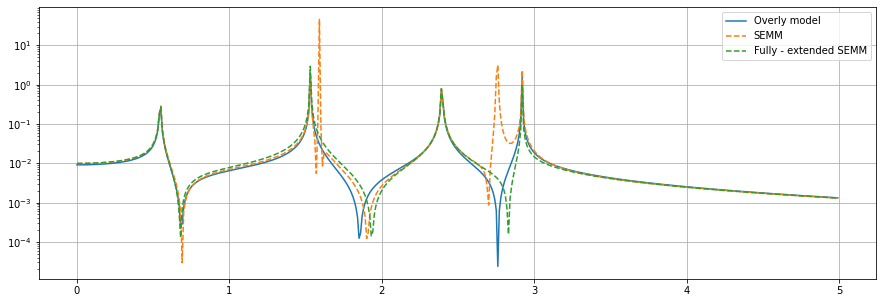

In [26]:
plt.figure(figsize = (15, 5))
p1 = 0
p2 = 0
# plt.semilogy(freq, np.abs(MK_par.FRF[:, p1, p2]), label = "Parent model")
plt.semilogy(freq, np.abs(MK_ov.FRF[:, p1, p2]), label = "Overly model")
plt.semilogy(freq, np.abs(Y_SEMM_pyFBS_basic[:, p1, p2]), "--", label = "SEMM")
plt.semilogy(freq, np.abs(Y_SEMM_pyFBS_fully_extended[:, p1, p2]), "--", label = "Fully - extended SEMM")
plt.legend()
plt.grid();

# Real case example:

Importing experimental data from prickle file. 

In [27]:
#load experimental data
exp_file = r"./lab_testbench/Measurements/Y_AB.p"

freq, Y_exp = np.load(exp_file, allow_pickle = True)
Y_exp = np.transpose(Y_exp, (2, 0, 1))

In [28]:
# load locatio of impacts and responses in experiment
xlsx = r"./lab_testbench/Measurements/AM_Measurements.xlsx"

df_chn = pd.read_excel(xlsx, sheet_name='Channels_AB')
df_imp = pd.read_excel(xlsx, sheet_name='Impacts_AB')

In [29]:
# load numerical model

full_file = r"./lab_testbench/FEM/AB.full"
rst_file = r"./lab_testbench/FEM/AB.rst"

MK = pyFBS.MK_model(rst_file, full_file, no_modes = 100, recalculate = False)

MK.FRF_synth(df_chn,df_imp,
             f_start=0,
             f_end=2002.5,
             f_resolution=2.5,
             modal_damping = 0.003,
             frf_type = "accelerance")

[100]
[160]
[3]


In [30]:
selected_impacts_index = np.array([4, 6, 8, 9, 10, 15, 21, 22, 23]) # These are some randomly selected impact locations

In [31]:
Y_AB_SEMM = pyFBS.SEMM(MK.FRF, Y_exp[:, :, selected_impacts_index],
                       df_chn_num = df_chn,
                       df_imp_num = df_imp,
                       df_chn_exp = df_chn,
                       df_imp_exp = df_imp.iloc[selected_impacts_index],
                       SEMM_type='fully-extend')

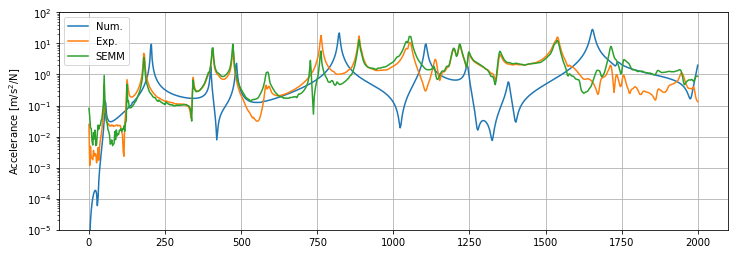

In [32]:
s1 = 12
s2 = 12

plt.figure(figsize = (12,4))
plt.semilogy(MK.freq,np.abs(MK.FRF[:,s1,s2]), label = "Num.")
plt.semilogy(freq,np.abs(Y_exp[:, s1,s2]), label = "Exp.")
plt.semilogy(freq,np.abs(Y_AB_SEMM[:, s1,s2]), label = "SEMM")
plt.ylabel("Accelerance [m/s$^2$/N]")
plt.legend()
plt.ylim(10**-5, 10**2)
plt.grid();

## Applications of SEMM

### Full-field FRF estimation from noisy high-speed-camera
<li> Bregar, T., Zaletelj, K., Čepon, G., Slavič, J., & Boltežar, M. (2021). Full-field FRF estimation from noisy high-speed-camera data using a dynamic substructuring approach. Mechanical Systems and Signal Processing, 150, 107263. <a href="https://www.sciencedirect.com/science/article/pii/S088832702030649X">https://www.sciencedirect.com/science/article/pii/S088832702030649X</a></li>
<p>
<img src="http://lab.fs.uni-lj.si/ladisk/data/pic/graphical_abstract_full_field_TB.png" width=1000/>
</p>

### Data consistensy idenfication
<li> Kodrič, M., Čepon, G., & Boltežar, M. (2021). Experimental framework for identifying inconsistent measurements in frequency-based substructuring. Mechanical Systems and Signal Processing, 154, 107562. <a href="https://www.sciencedirect.com/science/article/pii/S088832702030649X">https://www.sciencedirect.com/science/article/pii/S088832702030649X</a></li>
<p>
<img src="./pics/data_consistency_identification.png" width=1000/>
</p>

### Improving the accuracy of NAH-based structural admittances by integrating response measurement using SEMM
<li> Ocepek, D., Kodrič, M., Čepon, G., & Boltežar, M. (2021). On the estimation of structural admittances from acoustic measurement using a dynamic substructuring approach. Applied Acoustics, 180, 108115. <a href="https://www.sciencedirect.com/science/article/pii/S0003682X21002085">https://www.sciencedirect.com/science/article/pii/S0003682X21002085</a></li>
<p>
<img src="http://lab.fs.uni-lj.si/ladisk/data/pic/Domen%20Ocepek%20-%20On%20the%20estimation%20of%20structural%20admittances%20from%20acoustic%20measurement%20using%20a%20dynamic%20substructuring%20approach.JPG" width=1000/>
</p>

# SEREP
SEREP (System Equivalent Reduction Expansion Process) is a method for expansion of measured DoFs to unmeasured locations contained in a numerical model. The whole formulation is defined in the modal domain, therefore for its application, it is necessary to identify natural frequencies and corresponding mode shapes. It is one of the most popular expansion method, used in a variety of applications. SEMM is similar to the SEREP method, except that it is defined in the frequency domain. 

Derivation of the SEREP method originates from the transformation of physical to modal coordinates.

\begin{equation}\label{serep_1}
\boldsymbol{u} = \mathbf{\Phi}\,\boldsymbol{\eta}\quad\Rightarrow\quad
\begin{bmatrix}
\boldsymbol{u}_{i}\\ \boldsymbol{u}_{b}
\end{bmatrix}
= 
\begin{bmatrix}
\mathbf{\Phi}_{ir}&\mathbf{\Phi}_{it}\\
\mathbf{\Phi}_{br}&\mathbf{\Phi}_{bt}
\end{bmatrix}\,
\begin{bmatrix}
\boldsymbol{\eta}_{r}\\ \boldsymbol{\eta}_{t}
\end{bmatrix}
\end{equation}

Assuming that modal truncation is negligible, equation simplifies to:

\begin{equation}\label{serep_2}
\begin{bmatrix}
\boldsymbol{u}_{i}\\ \boldsymbol{u}_{b}
\end{bmatrix}
= 
\begin{bmatrix}
\mathbf{\Phi}_{ir}\\
\mathbf{\Phi}_{br}
\end{bmatrix}\,
\boldsymbol{\eta}_{r} 
\quad \Rightarrow\quad
\begin{matrix}
\boldsymbol{u}_{i} = \mathbf{\Phi}_{ir}\,\boldsymbol{\eta}_{r} 
\\
\boldsymbol{u}_{b} = \mathbf{\Phi}_{br}\,\boldsymbol{\eta}_{r} 
\end{matrix}\,.
\end{equation}

In direct connection with the experimental - overlay model, are only coordinates in $ \boldsymbol{u}_{b} $, therefore modal coordinates can be expressed as:

\begin{equation}
\boldsymbol{\eta}_{r}  = (\mathbf{\Phi}_{br})^{-1}\,\boldsymbol{u}_{b}\,.
\end{equation}

Now, the transformation matrix is defined as:

\begin{equation}\label{serep_3}
\begin{bmatrix}
\boldsymbol{u}_{i}\\ \boldsymbol{u}_{b}
\end{bmatrix}
= 
\begin{bmatrix}
\mathbf{\Phi}_{ir}\\
\mathbf{\Phi}_{br}
\end{bmatrix}\,
(\mathbf{\Phi}_{br})^{-1}\,\boldsymbol{u}_{b}
= 
\mathbf{T}\,\boldsymbol{u}_{b}\,.
\end{equation}

In the case where matrix $ \mathbf{\Phi}_{br} $ is square, meaning that a number of modes are the same as the number of DoFs, then transformation is performed without filtering (this type of expansion is called also SEREPa) and equation simplifies to:

\begin{equation}\label{serep_4}
\begin{bmatrix}
\boldsymbol{u}_{i}\\ \boldsymbol{u}_{b}
\end{bmatrix}
= 
\begin{bmatrix}
\mathbf{\Phi}_{ir}(\mathbf{\Phi}_{br})^{-1}\\
\mathbf{I}
\end{bmatrix}\,\boldsymbol{u}_{b}
= 
\mathbf{T}^{a}\,\boldsymbol{u}_{b}\,.
\end{equation}

If the number of DoFs in the experimental - parent model is bigger than the number of observed mode shapes, then transformation is performed using filtering in a least-squares sense:

\begin{equation}
\begin{bmatrix}
\boldsymbol{u}_{i}\\ \boldsymbol{u}_{b}
\end{bmatrix}
= 
\begin{bmatrix}
\mathbf{\Phi}_{ir}(\mathbf{\Phi}_{br})^{+}\\
\mathbf{\Phi}_{br}(\mathbf{\Phi}_{br})^{+}\\
\end{bmatrix}\,\boldsymbol{u}_{b}
= 
\mathbf{T}\,\boldsymbol{u}_{b}\,.
\end{equation}

So, the final form of equation for the expansion using SEREP method is:

\begin{equation}
\boldsymbol{u}^{\text{SEREP}} = \mathbf{T}\,\boldsymbol{u}_{\text{ov}}\,,
\end{equation}

\begin{equation}
\begin{bmatrix}
\mathbf{\Phi}_{ir}\\
\mathbf{\Phi}_{br}
\end{bmatrix}^{\text{SEREP}} \,\boldsymbol{\eta}_{r} = \mathbf{T}\,\begin{bmatrix}
\mathbf{\Phi}_{ir}
\end{bmatrix}^{\text{ov}} \,\boldsymbol{\eta}_{r}\,,
\end{equation}

\begin{equation}
\begin{bmatrix}
\mathbf{\Phi}_{ir}\\
\mathbf{\Phi}_{br}
\end{bmatrix}^{\text{SEREP}} = \mathbf{T}\,\begin{bmatrix}
\mathbf{\Phi}_{ir}
\end{bmatrix}^{\text{ov}}\,.
\end{equation}

In [33]:
SEREP_mode_shape = pyFBS.SEREP(MK_par.eig_vec[:, :2], MK_ov.eig_vec[2:, :2], df_response_parent, df_response_overlay)

Condition number:2.95


<div class="alert alert-block alert-warning">
    <i class="fa fa-exclamation-triangle" aria-hidden="true"></i>
    <b>Warning!</b> 
    As we can see from the derivation of the SEREP method, the inverse of the modal matrix appears in it. For the meaningful result of the inverse, the modal matrix must contain at least as many rows as there are columns. In our case, this means that we can take into account at most the first two modal shapes in the matrix, since we have only 2 DoFs present in the experimental model.
</div>

In [34]:
freq_SEREP, FRF_SEREP = pyFBS.MK_model.custom_FRF_synth(MK_ov.eig_freq[:2], 
                                                        SEREP_mode_shape, 
                                                        SEREP_mode_shape,
                                                        f_start=0,
                                                        f_end=5,
                                                        f_resolution=0.01,)

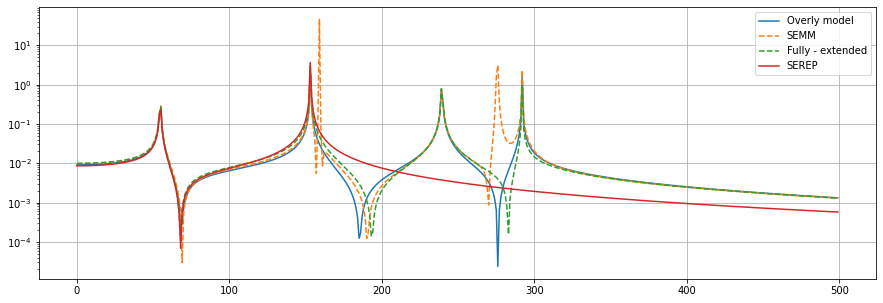

In [35]:
plt.figure(figsize = (15, 5))
p1 = 0
p2 = 0
# plt.semilogy(np.abs(MK_par.FRF[:, p1, p2]), label = "Parent model")
plt.semilogy(np.abs(MK_ov.FRF[:, p1, p2]), label = "Overly model")
plt.semilogy(np.abs(Y_SEMM_pyFBS_basic[:, p1, p2]), "--", label = "SEMM")
plt.semilogy(np.abs(Y_SEMM_pyFBS_fully_extended[:, p1, p2]), "--", label = "Fully - extended")
plt.semilogy(np.abs(FRF_SEREP[:, p1, p2]), "-", label = "SEREP")
plt.legend()
plt.grid();

> <i class="fa fa-quote-right"></i> <b>That's a wrap! Want to know more?</b> 
> <ul>
    <li> Klaassen, S. W., van der Seijs, M. V., & de Klerk, D. (2018). System equivalent model mixing. Mechanical Systems and Signal Processing, 105, 90-112. <a href="https://www.sciencedirect.com/science/article/pii/S0888327017306301">https://www.sciencedirect.com/science/article/pii/S0888327017306301</a></li>
    <li> Klaassen, S. W., & van der Seijs, M. V. (2018). Introducing semm: A novel method for hybrid modelling. In Dynamics of Coupled Structures, Volume 4 (pp. 117-125). Springer, Cham. <a href="https://link.springer.com/chapter/10.1007/978-3-319-74654-8_10">https://link.springer.com/chapter/10.1007/978-3-319-74654-8_10</a></li>
    <li> Saeed, Z., Klaassen, S. W., Firrone, C. M., Berruti, T. M., & Rixen, D. J. (2020). Experimental Joint Identification Using System Equivalent Model Mixing in a Bladed Disk. Journal of Vibration and Acoustics, 142(5), 051001.<a href="https://doi.org/10.1115/1.4047361">https://doi.org/10.1115/1.4047361</a></li>
    <li> Pasma, E., Klaassen, S., Nieuwenhuijse, L., Van Der Seijs, M., & Lennström, D. (2018). Application of system equivalent model mixing (SEMM) to model the structural dynamic properties of a complex vehicle component using numerical and experimental data. Proceedings of ISMA2018.<a href="https://doi.org/10.1115/1.4047361">https://doi.org/10.1115/1.4047361</a></li>
    <li> Bregar, T., Zaletelj, K., Čepon, G., Slavič, J., & Boltežar, M. (2021). Full-field FRF estimation from noisy high-speed-camera data using a dynamic substructuring approach. Mechanical Systems and Signal Processing, 150, 107263. <a href="https://www.sciencedirect.com/science/article/pii/S088832702030649X">https://www.sciencedirect.com/science/article/pii/S088832702030649X</a></li>
    <li> Kodrič, M., Čepon, G., & Boltežar, M. (2021). Experimental framework for identifying inconsistent measurements in frequency-based substructuring. Mechanical Systems and Signal Processing, 154, 107562. <a href="https://www.sciencedirect.com/science/article/pii/S088832702030649X">https://www.sciencedirect.com/science/article/pii/S088832702030649X</a></li>
    <li> Chen, Y., Avitabile, P., & Dodson, J. (2020). Data consistency assessment function (DCAF). Mechanical Systems and Signal Processing, 141, 106688. <a href="https://www.sciencedirect.com/science/article/pii/S0888327020300741">https://www.sciencedirect.com/science/article/pii/S0888327020300741</a></li>
    <li> Ocepek, D., Kodrič, M., Čepon, G., & Boltežar, M. (2021). On the estimation of structural admittances from acoustic measurement using a dynamic substructuring approach. Applied Acoustics, 180, 108115. <a href="https://www.sciencedirect.com/science/article/pii/S0003682X21002085">https://www.sciencedirect.com/science/article/pii/S0003682X21002085</a></li>
</ul>